In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import squarify
import datetime
%matplotlib inline

In [2]:
df_linkedin_connections = pd.read_csv('connectionsall.csv')

In [3]:
df_linkedin_invitations = pd.read_csv('invitationsall.csv')

In [4]:
df_linkedin_connections.head()

,Unnamed: 0,name,last,email,company,position,connected_on,year,day_week,time
0,0,Jacob,Sisk,jacob.sisk@gmail.com,Credit Suisse Labs,CEO,2018-05-19 13:23:00,2018,Saturday,13
1,1,Shailesh,Agarwal,sa268@pacbell.net,Amerind Solutions - Technology Development,CTO and VP Engineering,2018-03-07 23:06:00,2018,Wednesday,23
2,2,Frank,Maxwell,fwm1@pge.com,Pacific Gas and Electric Company,"Sr. Manager, Gas Operations Control Center",2017-02-01 07:01:00,2017,Wednesday,7
3,3,David,Talby,david@talby.com,Pacific AI,CTO,2018-03-08 07:45:00,2018,Thursday,7
4,4,David,"Weaver, PhD, PE",dweaver@gmail.com,ERM: Environmental Resources Management,"Partner, Area Manager, Northern California and...",2016-06-28 11:31:00,2016,Tuesday,11


In [5]:
df_linkedin_connections["connected_on"] = pd.to_datetime(
    df_linkedin_connections.connected_on)

In [6]:
df_linkedin_connections[
    "year"] = df_linkedin_connections.connected_on.dt.year

In [7]:
sns.set_context("talk")
sns.set(style="darkgrid", font_scale=2)

Text(0,0.5,'Count of Connections')

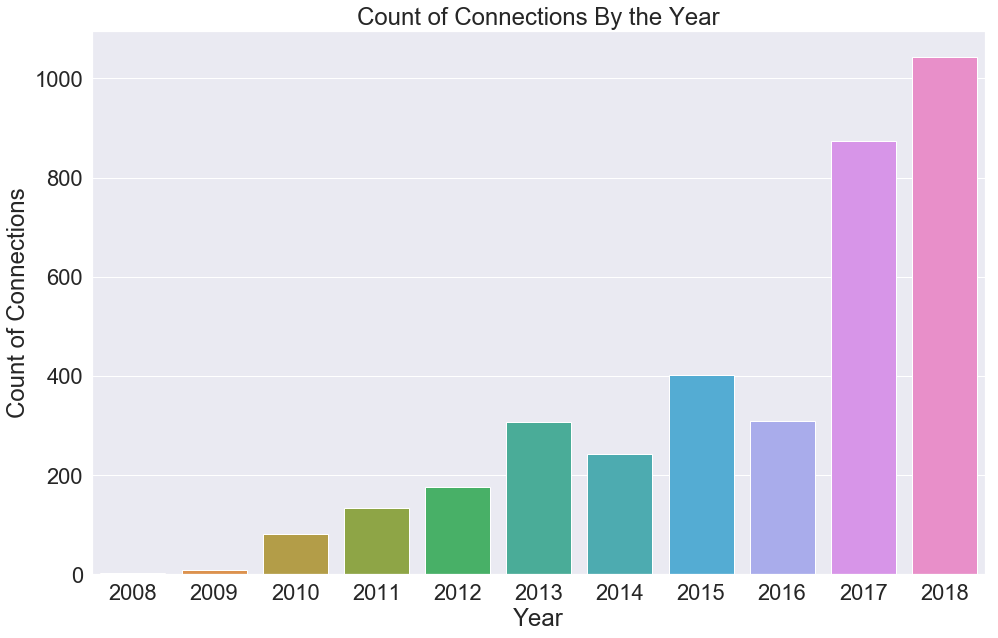

In [8]:
plt.figure(figsize=(16, 10))
sns.countplot(x="year", data=df_linkedin_connections, orient='v')
plt.title("Count of Connections By the Year")
plt.xlabel("Year")
plt.ylabel("Count of Connections")

In [9]:
df_linkedin_connections[
    'day_week'] = df_linkedin_connections.connected_on.dt.weekday_name
df_linkedin_connections['day_week'] = pd.Categorical(
    df_linkedin_connections['day_week'],categories=[
        'Sunday', 'Monday', 'Tuesday','Wednesday',
        'Thursday', 'Friday', 'Saturday', 
                                           ], ordered=True)

Text(0,0.5,'Count of Connections')

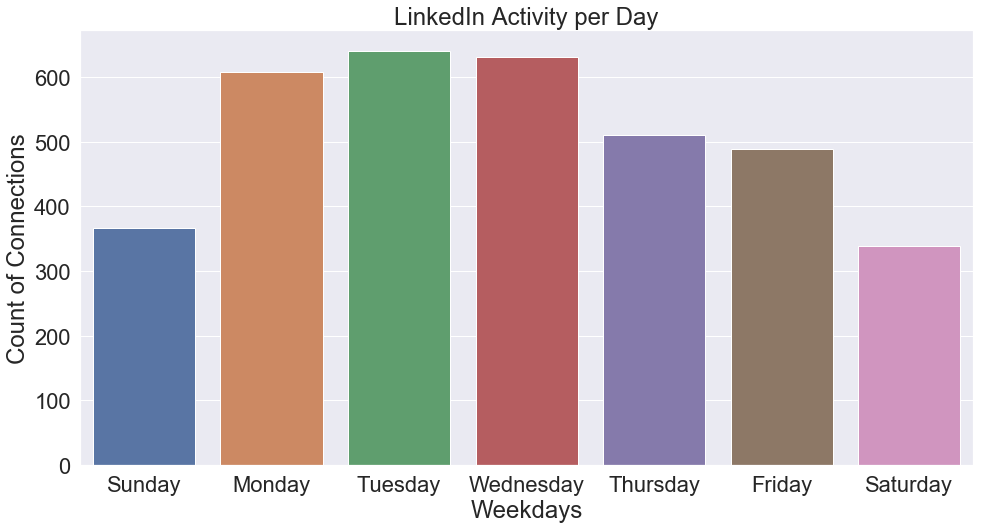

In [10]:
plt.figure(figsize=(16, 8))
sns.countplot(x="day_week", data=df_linkedin_connections, orient='v')
plt.title("LinkedIn Activity per Day")
plt.xlabel("Weekdays")
plt.ylabel("Count of Connections")

In [11]:
df_linkedin_connections[
    "time"] = df_linkedin_connections.connected_on.dt.hour

Text(0,0.5,'Count of Connections')

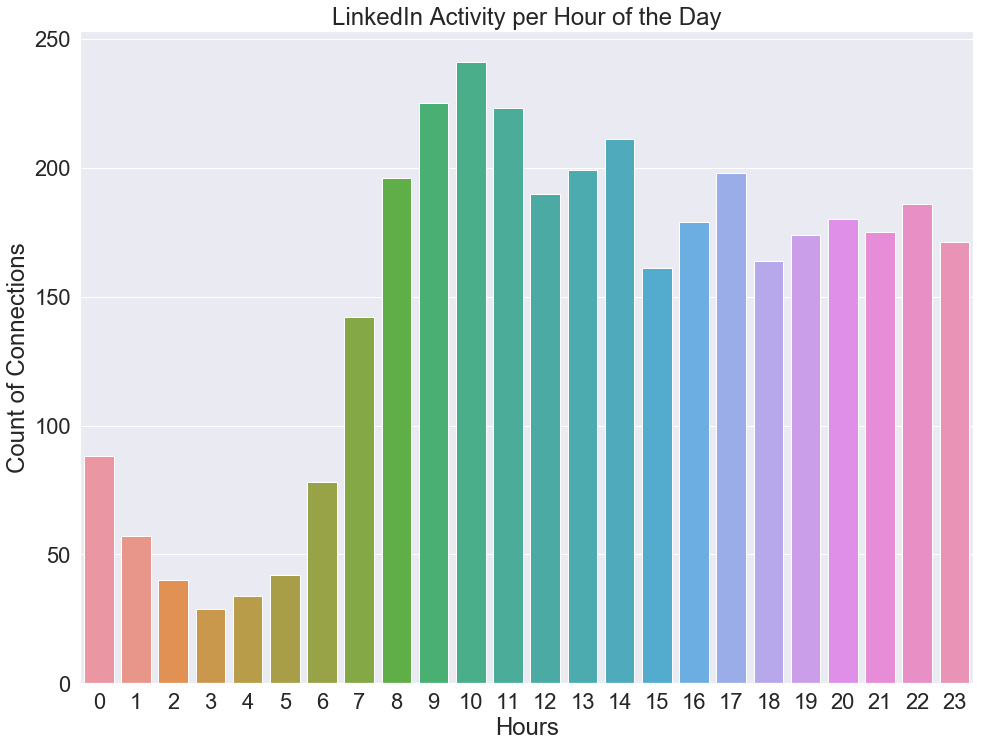

In [12]:
plt.figure(figsize=(16, 12))
sns.countplot(x="time", data=df_linkedin_connections, orient='v')
plt.title("LinkedIn Activity per Hour of the Day")
plt.xlabel("Hours")
plt.ylabel("Count of Connections")

In [13]:
df_linkedin_connections_2 = pd.pivot_table(df_linkedin_connections[
    ['day_week', 'time', 'connected_on']],index=['day_week', 'time'], 
                                           aggfunc='count')

In [14]:
df_linkedin_connections_3 = df_linkedin_connections_2.unstack(level=0)

In [15]:
df_linkedin_connections_3 = df_linkedin_connections_3.reindex(
    labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
         'Saturday', 'Sunday'], axis=1, level=1)

In [16]:
morning_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + " am"
    morning_hours.append(detailed_hour)

In [17]:
afternoon_hours = []
for hour in range(1, 12):
    detailed_hour = str(hour) + " pm"
    afternoon_hours.append(detailed_hour)

In [18]:
detailed_hours = ["12 am"] + morning_hours + ["12 pm"] + afternoon_hours

In [19]:
day_short_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

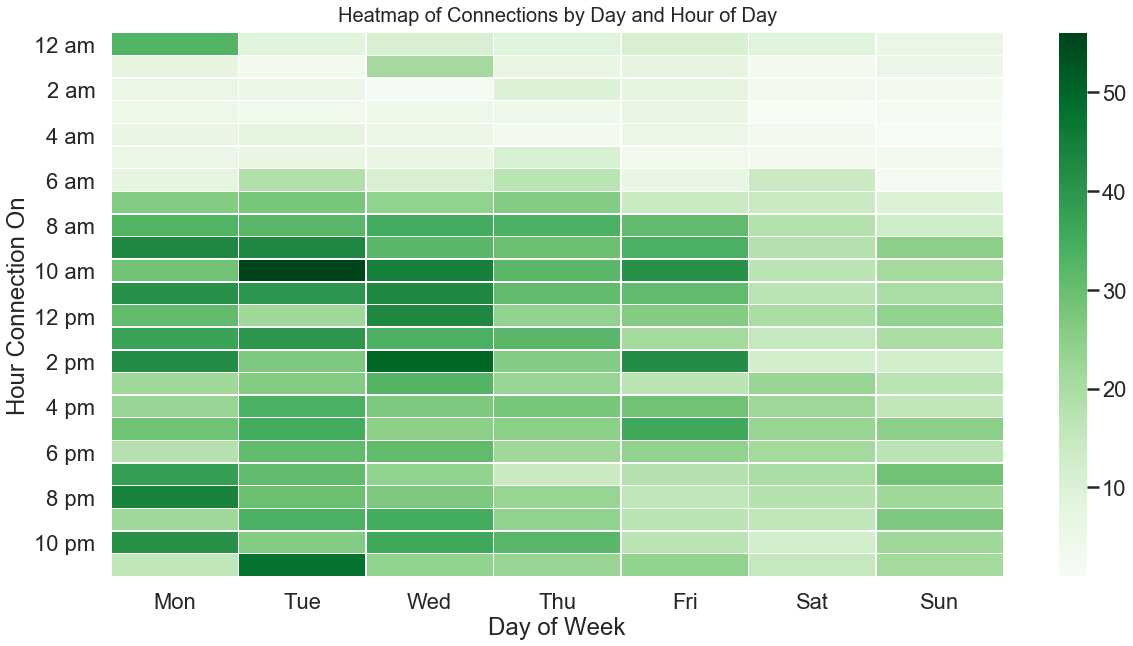

In [20]:
sns.set_context("poster")
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_linkedin_connections_3, cmap='Greens', 
                 annot=False, fmt="g", linewidths=.5, ax=ax, 
                 xticklabels=day_short_names, yticklabels=detailed_hours)
ax.axes.set_title("Heatmap of Connections by Day and Hour of Day", 
                  fontsize=20, y=1.01)
ax.set(xlabel='Day of Week', ylabel='Hour Connection On')
for label in ax.yaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

Text(0,0.5,'Top 20 Positions')

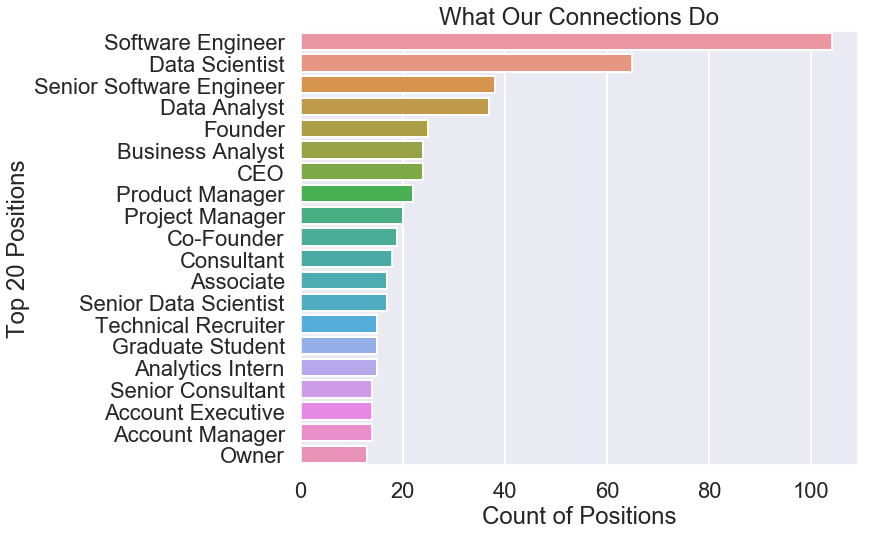

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(y="position", data=df_linkedin_connections, orient='h',
             order=df_linkedin_connections.position.value_counts()
              .iloc[:20].index)
plt.title("What Our Connections Do")
plt.xlabel("Count of Positions")
plt.ylabel("Top 20 Positions")

In [22]:
count = df_linkedin_connections.position.value_counts().iloc[:10]

In [23]:
print(count)

Software Engineer           104
Data Scientist               65
Senior Software Engineer     38
Data Analyst                 37
Founder                      25
Business Analyst             24
CEO                          24
Product Manager              22
Project Manager              20
Co-Founder                   19
Name: position, dtype: int64


In [24]:
positions = df_linkedin_connections.position.value_counts(
).iloc[:10].index

In [25]:
print(positions)

Index(['Software Engineer', 'Data Scientist', 'Senior Software Engineer',
       'Data Analyst', 'Founder', 'Business Analyst', 'CEO', 'Product Manager',
       'Project Manager', 'Co-Founder'],
      dtype='object')


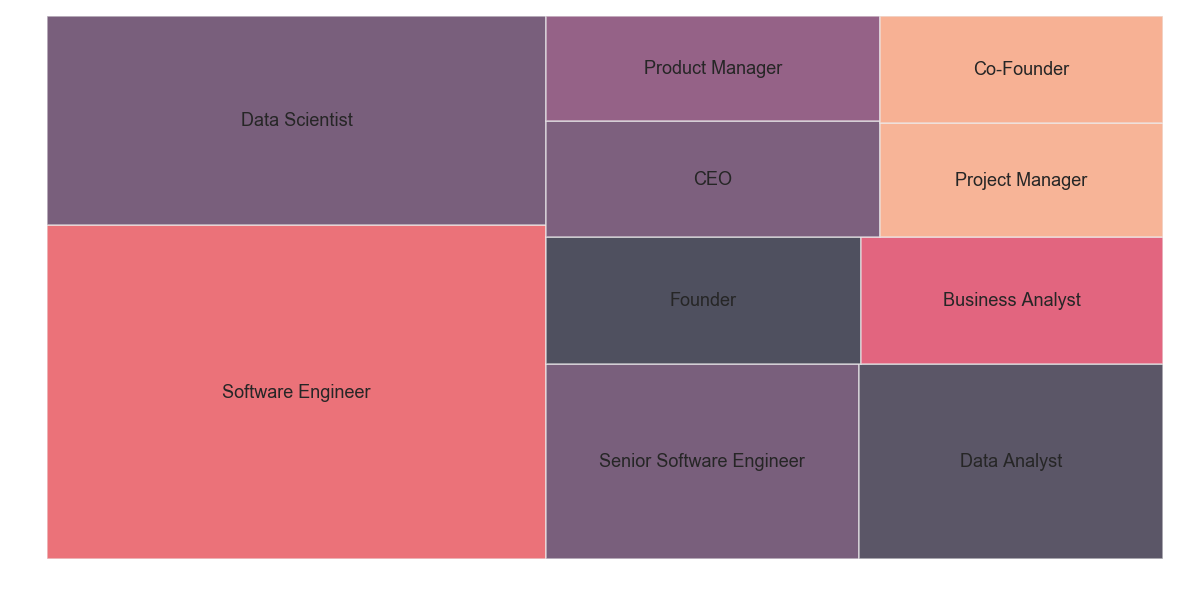

In [26]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
sns.set_context("talk")
squarify.plot(sizes=count, label=positions, alpha=0.7)
plt.axis('off')
plt.show()

Text(0,0.5,'Top 12 Companies')

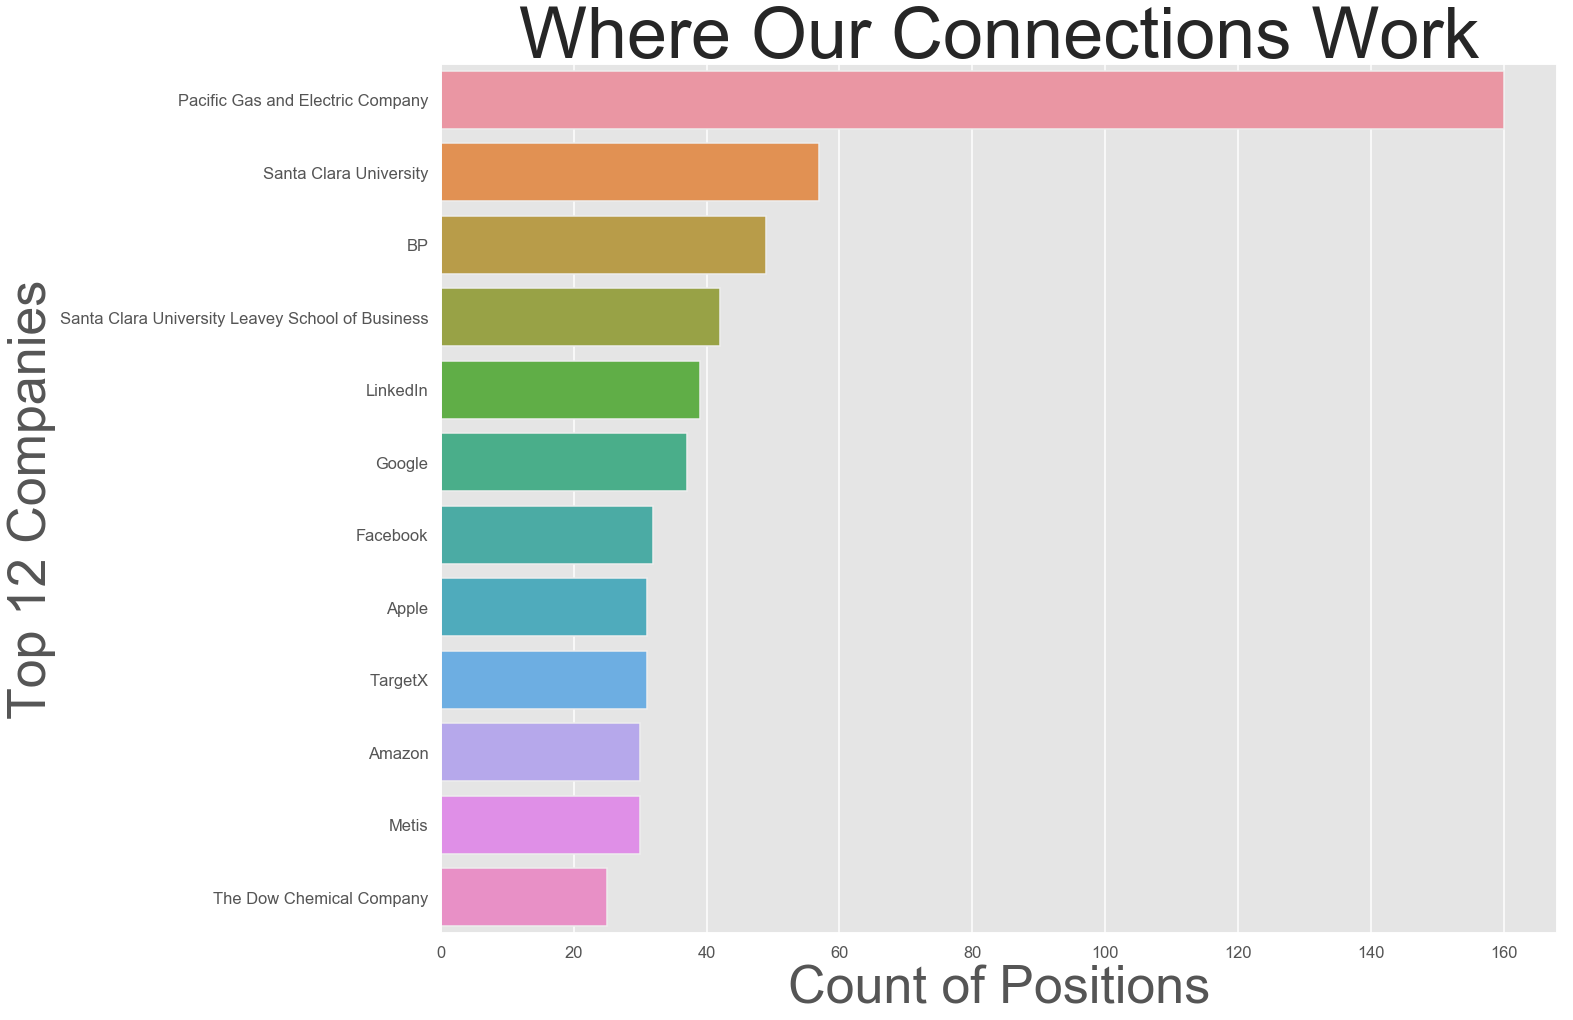

In [27]:
plt.figure(figsize=(20, 16))
sns.countplot(y="company", data=df_linkedin_connections,
              orient='h',
             order=df_linkedin_connections.company.value_counts()
              .iloc[:12].index)
plt.title("Where Our Connections Work", fontsize=72)
plt.xlabel("Count of Positions", fontsize=52)
plt.ylabel("Top 12 Companies", fontsize=52)

In [28]:
df_linkedin_invitations.head()

,Unnamed: 0,from,to,sent_time_stamp,message,direction,day_week,new,time,year
0,0,Carlos Rengifo,Daniel Friedman,2018-06-23 20:54:00,NaN,OUTGOING,Saturday,Carlos,20,2018
1,1,Carlos Rengifo,David Feliciano,2018-06-19 21:59:00,NaN,OUTGOING,Tuesday,Carlos,21,2018
2,2,Carlos Rengifo,Niels Bantilan,2018-06-08 07:58:00,"Niels, I'm completing a Master's at Santa Clar...",OUTGOING,Friday,Carlos,7,2018
3,3,Carlos Rengifo,Necati Ertekin,2018-06-02 11:38:00,NaN,OUTGOING,Saturday,Carlos,11,2018
4,4,Carlos Rengifo,Venkat Bhethanabotla,2018-03-09 15:17:00,NaN,OUTGOING,Friday,Carlos,15,2018


In [29]:
df_linkedin_invitations["sent_time_stamp"] = pd.to_datetime(df_linkedin_invitations.sent_time_stamp)

In [30]:
df_linkedin_invitations[
    'day_week'] = df_linkedin_invitations.sent_time_stamp.dt.weekday_name
df_linkedin_invitations['day_week'] = pd.Categorical(df_linkedin_invitations['day_week'], categories=[
    'Sunday','Monday','Tuesday','Wednesday','Thursday',
  'Friday','Saturday',], ordered=True)

In [31]:
a = df_linkedin_invitations["from"].str[:20]
b = df_linkedin_invitations["to"].str[:20]
df_linkedin_invitations['new'] = np.where(a == 
                                          'Carlos Rengifo',
                                          "Carlos", 
            np.where(a == 'Leonardo Barbosa', "Leo",
            np.where(a == 'Sunanda Daftari', "Sunanda",
            np.where(a == 'Ren Hui', "Ren",
            np.where(a == 'Ka Yan (Ariel) Yeung', "Ariel",
            np.where(a == 'Palak Bhatia', "Palak",
            np.where(a == 'Kiran Singh', "Kiran",
            np.where(a == 'Sarita Inguava', "Sarita",
            np.where(a == 'Daniel Friedman', "Dan",
            np.where(b == 'Carlos Rengifo', "Carlos", 
            np.where(b == 'Leonardo Barbosa', "Leo",
            np.where(b == 'Sunanda Daftari', "Sunanda",
            np.where(b == 'Ren Hui', "Ren",
            np.where(b == 'Ka Yan (Ariel) Yeung', "Ariel",
            np.where(b == 'Palak Bhatia', "Palak",
            np.where(b == 'Kiran Singh', "Kiran",
            np.where(b == 'Sarita Inguava', "Sarita",         
            np.where(b == 'Daniel Friedman', "Dan", 0))))))))))))))))))

In [32]:
df_linkedin_invitations.head()

,Unnamed: 0,from,to,sent_time_stamp,message,direction,day_week,new,time,year
0,0,Carlos Rengifo,Daniel Friedman,2018-06-23 20:54:00,NaN,OUTGOING,Saturday,Carlos,20,2018
1,1,Carlos Rengifo,David Feliciano,2018-06-19 21:59:00,NaN,OUTGOING,Tuesday,Carlos,21,2018
2,2,Carlos Rengifo,Niels Bantilan,2018-06-08 07:58:00,"Niels, I'm completing a Master's at Santa Clar...",OUTGOING,Friday,Carlos,7,2018
3,3,Carlos Rengifo,Necati Ertekin,2018-06-02 11:38:00,NaN,OUTGOING,Saturday,Carlos,11,2018
4,4,Carlos Rengifo,Venkat Bhethanabotla,2018-03-09 15:17:00,NaN,OUTGOING,Friday,Carlos,15,2018


In [33]:
us = ['Carlos Rengifo', 'Leonardo Barbosa', 
      'Daniel Friedman', 'Sunanda Daftari', 
      'Ren Hui', 'Ka Yan (Ariel) Yeung', 'Palak Bhatia',
      'Kiran Singh', 'Sariata Inguava']

In [34]:
df1a = df_linkedin_invitations.loc[df_linkedin_invitations
                                   ['from'].isin(
                                       ['Carlos Rengifo',
                                        'Leonardo Barbosa',
                                        'Daniel Friedman', 
                                        'Sunanda Daftari', 
                                        'Ren Hui', 
                                        'Ka Yan (Ariel) Yeung', 
                                        'Palak Bhatia', 
                                        'Kiran Singh', 
                                        'Sarita Inguava'])]

In [35]:
df2a = df_linkedin_invitations.loc[df_linkedin_invitations['to'].isin(
    ['Carlos Rengifo',
                                     'Leonardo Barbosa',
                                     'Daniel Friedman',
                                     'Sunanda Daftari',
                                     'Ren Hui', 
                                     'Ka Yan (Ariel) Yeung',
                                     'Palak Bhatia',
                                     'Kiran Singh',
                                    'Sarita Inguava'])]

In [36]:
df1a.head()

,Unnamed: 0,from,to,sent_time_stamp,message,direction,day_week,new,time,year
0,0,Carlos Rengifo,Daniel Friedman,2018-06-23 20:54:00,NaN,OUTGOING,Saturday,Carlos,20,2018
1,1,Carlos Rengifo,David Feliciano,2018-06-19 21:59:00,NaN,OUTGOING,Tuesday,Carlos,21,2018
2,2,Carlos Rengifo,Niels Bantilan,2018-06-08 07:58:00,"Niels, I'm completing a Master's at Santa Clar...",OUTGOING,Friday,Carlos,7,2018
3,3,Carlos Rengifo,Necati Ertekin,2018-06-02 11:38:00,NaN,OUTGOING,Saturday,Carlos,11,2018
4,4,Carlos Rengifo,Venkat Bhethanabotla,2018-03-09 15:17:00,NaN,OUTGOING,Friday,Carlos,15,2018


In [37]:
df2a.head()

,Unnamed: 0,from,to,sent_time_stamp,message,direction,day_week,new,time,year
0,0,Carlos Rengifo,Daniel Friedman,2018-06-23 20:54:00,NaN,OUTGOING,Saturday,Carlos,20,2018
85,85,Carlos Rengifo,Carlos Rengifo,2018-03-07 16:39:00,NaN,OUTGOING,Wednesday,Carlos,16,2018
100,100,Carlos Rengifo,Ren Hui,2018-03-14 01:08:00,NaN,OUTGOING,Wednesday,Carlos,1,2018
113,113,Carlos Rengifo,Sarita Inguava,2018-03-08 08:37:00,NaN,OUTGOING,Thursday,Carlos,8,2018
138,138,Rebecca Mitchell,Carlos Rengifo,2018-06-13 16:11:00,NaN,INCOMING,Wednesday,Carlos,16,2018


In [38]:
df23 = [df1a, df2a]

In [39]:
df45 = pd.concat(df23)

Text(0,0.5,'Count of Invitations')

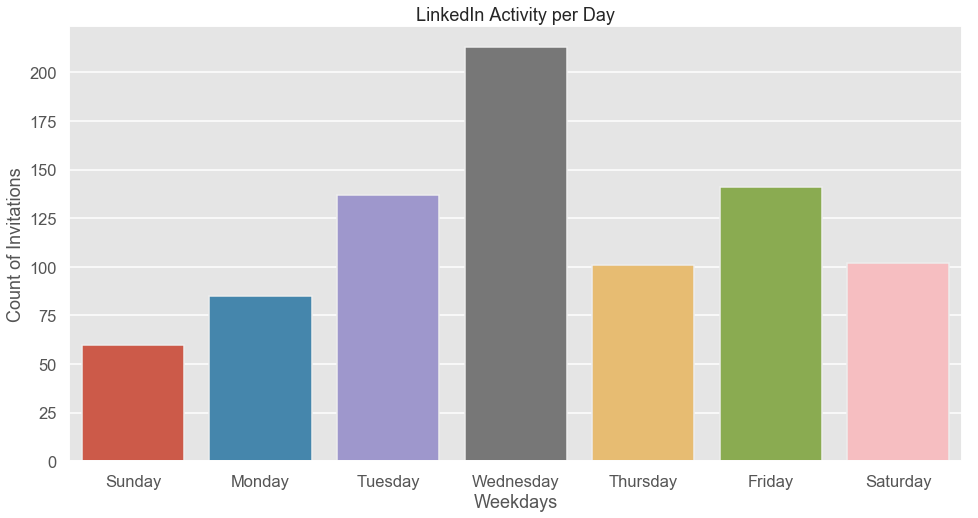

In [40]:
plt.figure(figsize=(16, 8))
sns.countplot(x="day_week", data=df_linkedin_invitations,
              orient='v')
plt.title("LinkedIn Activity per Day")
plt.xlabel("Weekdays")
plt.ylabel("Count of Invitations")

In [41]:
df_linkedin_invitations[
    "time"] = df_linkedin_invitations.sent_time_stamp.dt.hour

Text(0,0.5,'Count of Connections')

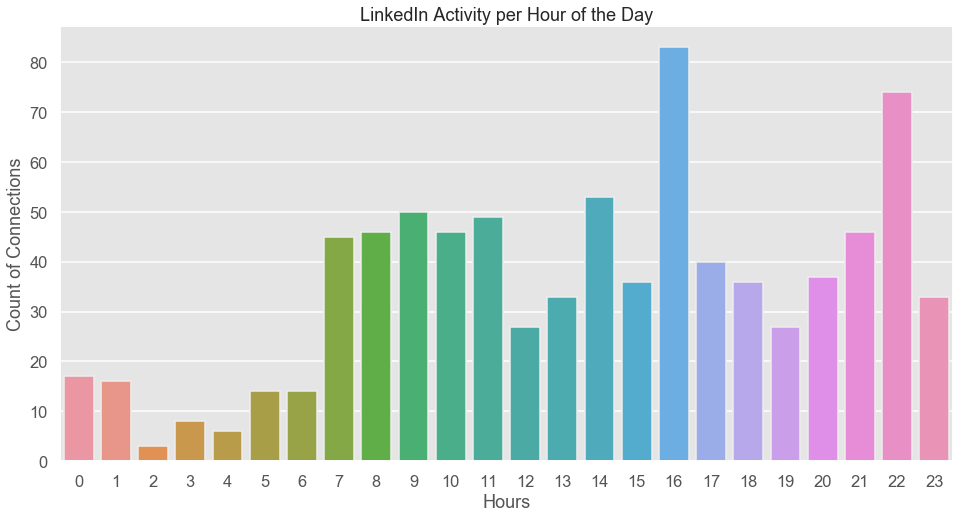

In [42]:
plt.figure(figsize=(16, 8))
sns.countplot(x="time", data=df_linkedin_invitations, 
              orient='v')
plt.title("LinkedIn Activity per Hour of the Day")
plt.xlabel("Hours")
plt.ylabel("Count of Connections")

In [43]:
df_linkedin_invitations[
    "year"] = df_linkedin_invitations.sent_time_stamp.dt.year

Text(0.5,0,'  ')

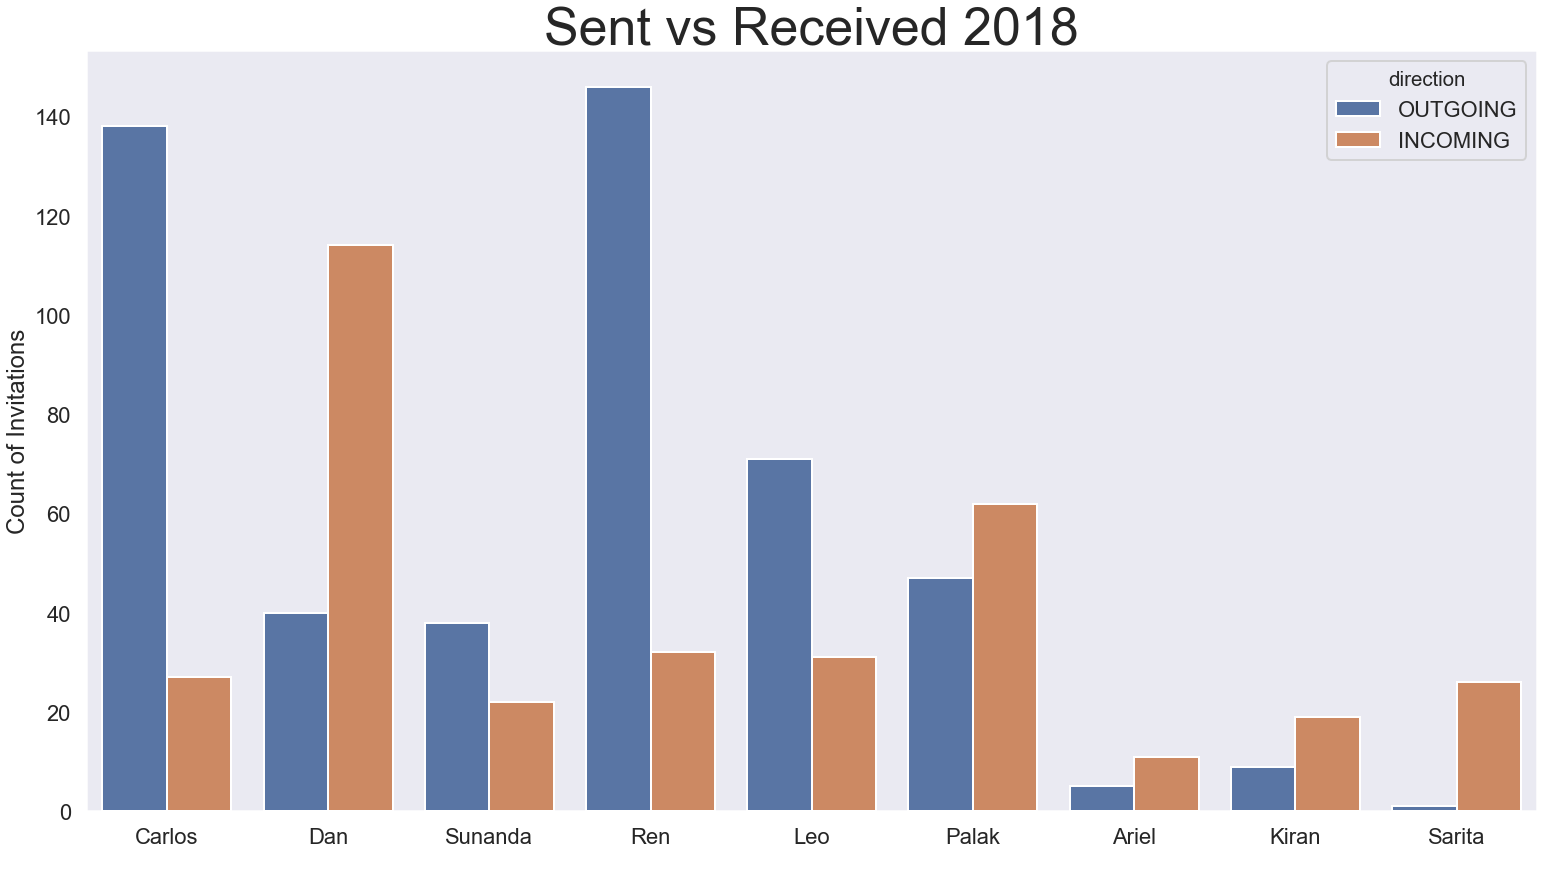

In [44]:
sns.set(style="dark") 
sns.set_context("poster")
plt.figure(figsize=(26, 14))
ax = sns.countplot(x="new", hue="direction",
                   data=df_linkedin_invitations)
ax.axes.set_title("Sent vs Received 2018", fontsize=52)
plt.ylabel("Count of Invitations")
plt.xlabel("  ")